# 1.Introduction

#### Tập dữ liệu dạng bảng bao gồm các cột là những yếu tố có thể ảnh hưởng đến tỷ lệ nghỉ việc và mức độ hài lòng của nhân viên.

#### Ta sẽ tìm ra các yếu tố có thể ảnh huổng đến tỷ lệ nghỉ việc và mức độ hài lòng của nhân viên.

1. Introduction
2. What are key factors that are playing into current attrition rates?
3. What are key factors that are playing into current satisfaction rates?
4. What are key factors that are playing into current satisfaction rates?

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

#### Load data

In [2]:
data = pd.read_csv("C:\\Users\Admin\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv")

#### Kiểm tra kích thước dữ liệu

In [3]:
data.shape

(1470, 35)

##### Dữ liệu bao gồm 1470 hàng và 35 cột

#### Kiểm tra và mô tả sơ bộ về dữ liệu

In [4]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Dữ liệu bao gồm cả dạng số và category.

Mô tả:

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement  1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating  1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction  1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'


In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


##### Dữ liệu không có gì bất thường

#### Kiểm tra giá trị null

In [6]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

##### Dữ liệu không chứa giá trị null


#### Kiểm tra giá trị NaN

In [7]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

##### Dữ liệu không chứa giá trị NaN

## Visualize

C:\Users\Admin\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


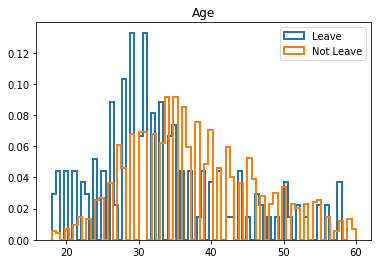

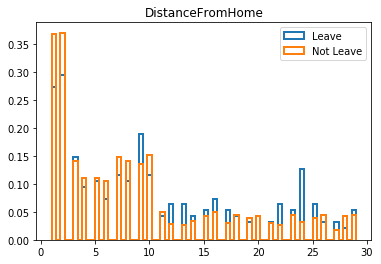

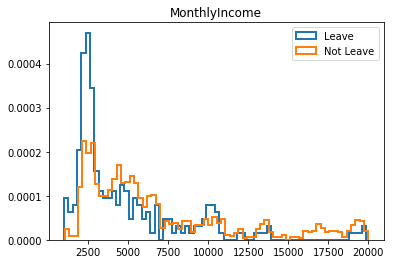

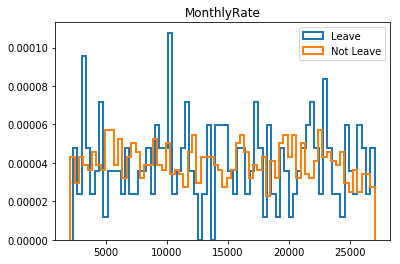

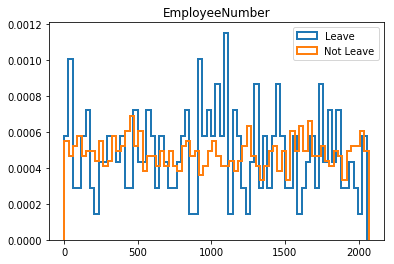

In [8]:
data_yes = data[data.Attrition == 'Yes']
data_no = data[data.Attrition == 'No']
feature = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 'EmployeeNumber']
for i in feature:
    plt.hist(data_yes[i], 70,normed=1, histtype='step', lw=2, label="Leave")
    plt.hist(data_no[i], 70,normed=1, histtype='step', lw=2, label="Not Leave")
    plt.title(i)
    plt.legend()
    plt.show()

#### Những người tuổi dưới 34 có tỷ lệ nghỉ việc cao hơn những người trên 34 tuổi.
#### Những người có thu nhập hàng tháng trong khoảng 2500 có tỷ lệ nghỉ việc cao hơn hẳn những người khác.

# 2.What are key factors that are playing into current attrition rates?

## AGE -> attrition rates



#### Xét sự ảnh hưởng của độ tuôi đến tỷ lệ nghỉ việc ở nhân viên

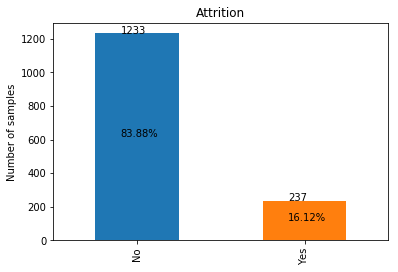

In [9]:
ax = data["Attrition"].value_counts().plot.bar()
ax.set_title('Attrition')
ax.set_ylabel('Number of samples')
for i in ax.patches:
    ax.text(i.get_x()+0.15, i.get_height(), i.get_height())
    ax.text(i.get_x()+0.15, i.get_height()/2, str(round((i.get_height()/1470)*100, 2))+'%')

#### Dữ liệu không đối xứng giữa số lượng mẫu nghỉ việc và không nghỉ việc.
#### 84% nhân viên không nghỉ việc trong khi tỷ lệ nghỉ việc chỉ có 16%.

In [10]:
age_yes = data[data.Attrition == 'Yes'].groupby(['Age']).count()
age_no = data[data.Attrition == 'No'].groupby(['Age']).count()
age = data.groupby(['Age']).count()

In [11]:
age_yes_x = age_yes.index
age_yes_y = []
for i in age_yes_x:
    age_yes_y.append(age_yes[age_yes.index==i].Attrition.values[0] / age[age.index == i].Attrition.values[0])

In [12]:
age_no_x = age_no.index
age_no_y = []
for i in age_no_x:
    age_no_y.append(age_no[age_no.index==18].Attrition.values[0] / age[age.index == i].Attrition.values[0])

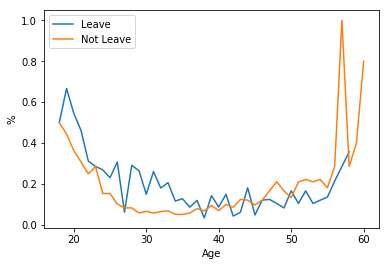

In [13]:
plt.plot(age_yes_x, age_yes_y, label='Leave')
plt.plot(age_no_x, age_no_y, label='Not Leave')
plt.xlabel('Age')
plt.ylabel('%')
plt.legend()
plt.show()

#### Trong khoảng từ 26 đến 34, tỷ lệ những người nghỉ việc cao hơn khoảng 3 lần so với những người không nghỉ việc.

#### Những người từ 57 đến 54 có tỷ lệ nghỉ việc thấp hơn.

#### single-sample T-test

#### H0: Nhân viên nghỉ việc thường có độ tuổi ngoài khoảng 26 đến 34.
#### H1: Nhân viên nghỉ việc thường có độ tuổi từ 26 đến 34.

In [14]:
# Độ tuổi trung bình
age_avg = data['Age'][data['Attrition']=='Yes'].mean()
print('Tuoi trung bình: ', age_avg)

Tuoi trung bình:  33.607594936708864


In [15]:
# Những người trong độ tuổi từ 26 đến 34
age_2634 = data[(data['Age'] >= 26) & (data['Age'] <= 34)]['Age']
print('So nguoi tu 26 den 34 tuoi: ', len(age_2634), 'nguoi')

So nguoi tu 26 den 34 tuoi:  528 nguoi


In [16]:
t_statistic, pvalue = stats.ttest_1samp(age_2634, age_avg)
print('t_statistic: ', t_statistic)
print('pvalue: ', pvalue)

t_statistic:  -29.49108698049455
pvalue:  1.2695068770857297e-113


##### Vì p< 0.05 -> loại bỏ H0, chấp nhận H1
##### Vậy những nhân viên nghỉ việc thường có độ tuổi từ 26 đến 34.

#### Independent samples t-test.
#### H0: tuổi không ảnh hưởng đến tỷ lệ nghỉ việc của nhân viên.
#### H1: tuổi có ảnh hưởng đến tỷ lệ nghỉ việc của nhân viên.

In [17]:
t_statistic, pvalue = stats.ttest_ind(data[data['Attrition']=='Yes'].Age, data[data['Attrition']=='No'].Age)
print('t_statistic: ', t_statistic)
print('pvalue: ', pvalue)

t_statistic:  -6.1786638353072165
pvalue:  8.356308021103649e-10


#### Vì pvalue < 0.05 -> loại bỏ H0, chấp nhận H1.
#### Vậy tuổi có ảnh hưởng đến tỷ lệ nghỉ việc của nhân viên.

## MonthlyIncome -> attrition rates

#### Xét sự ảnh hưởng của thu nhập hàng tháng đến tỷ lệ nghỉ việc ở nhân viên

Text(0, 0.5, 'Number of samples')

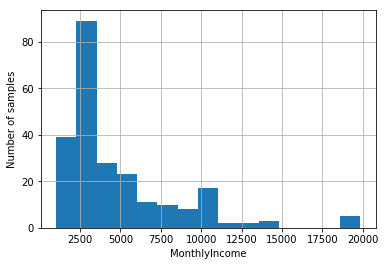

In [18]:
ax = data['MonthlyIncome'][data['Attrition']=='Yes'].hist(bins=15)
ax.set_xlabel('MonthlyIncome')
ax.set_ylabel('Number of samples')

####  Phần lớn những người nghỉ việc có thu nhập hàng tháng dưới 4000.

In [19]:
def fx(x):
    if(x < 2000):
        return 2000
    if(x < 4000):
        return 4000
    if(x < 6000):
        return 6000
    if(x < 8000):
        return 8000
    if(x < 10000):
        return 10000
    if(x < 12000):
        return 12000
    if(x < 14000):
        return 14000
    if(x < 16000):
        return 16000
    if(x < 18000):
        return 18000
    else:
        return 20000

In [20]:
data['MonthlyIncomeCate'] = data['MonthlyIncome'].apply(lambda x: fx(x))

In [21]:
income_yes = data[data['Attrition']=='Yes'].groupby(['MonthlyIncomeCate']).count()

income_no = data[data['Attrition']=='No'].groupby(['MonthlyIncomeCate']).count()

income = data.groupby(['MonthlyIncomeCate']).count()

In [22]:
income_yes_x = income_yes.index
income_yes_y = []
for i in income_yes_x:
    income_yes_y.append(income_yes[income_yes.index == i].Attrition.values[0]/income[income.index==i].Age.values[0])
income_no_x = income_no.index
income_no_y = []
for i in income_no_x:
    income_no_y.append(income_no[income_no.index == i].Attrition.values[0]/income[income.index==i].Age.values[0])

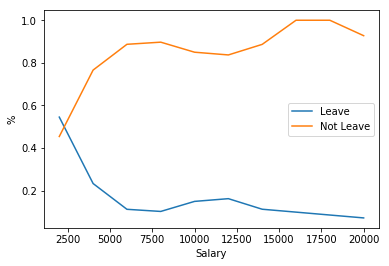

In [23]:
plt.plot(income_yes_x, income_yes_y, label="Leave")
plt.plot(income_no_x, income_no_y, label="Not Leave")
plt.xlabel("Salary")
plt.ylabel("%")
plt.legend()
plt.show()

#### Những người có thu nhập dưới 4000 có tỷ lệ nghỉ việc cao hơn rất nhiều những người khác.
#### Từ thu nhập 12500 trở đi, lương càng cao thì tỷ lệ nghỉ việc càng thấp.

##### Sử dụng single-sample T-test:
##### H0: Những nhân viên nghỉ việc có thu nhập trên 4000.
##### H1: Những nhân viên nghỉ việc có thu nhập dưới 4000.

In [24]:
# Thu nhập trung bình
income_avg = data['MonthlyIncome'][data['Attrition']=='Yes'].mean()
print('Thu nhập trung bình: ', income_avg)

Thu nhập trung bình:  4787.0928270042195


In [25]:
# Những người có thu nhập dưới 6000
income4 = data[(data['MonthlyIncome'] <= 4000)]['MonthlyIncome']
print('So nguoi co thu nhap duoi 6000: ', len(income4), 'nguoi')

So nguoi co thu nhap duoi 6000:  543 nguoi


In [26]:
t_statistic, pvalue = stats.ttest_1samp(income4, income_avg)
print('t_statistic: ', t_statistic)
print('pvalue: ', pvalue)

t_statistic:  -78.31454105197331
pvalue:  1.0904862888735927e-297


##### Vì p<0.05 -> loại bỏ H0, chấp nhận H1
##### Vậy Những nhân viên nghỉ việc có thu nhập dưới 4000.

#### Independent samples t-test.
#### H0: Thu nhập hàng tháng không ảnh hưởng đến tỷ lệ nghỉ việc của nhân viên.
#### H1: Thu nhập hàng tháng có ảnh hưởng đến tỷ lệ nghỉ việc của nhân viên.

In [27]:
t_statistic, pvalue = stats.ttest_ind(data[data['Attrition']=='Yes'].MonthlyIncome,
                                      data[data['Attrition']=='No'].MonthlyIncome)
print('t_statistic: ', t_statistic)
print('pvalue: ', pvalue)

t_statistic:  -6.203935765608938
pvalue:  7.14736398535381e-10


#### Vì p < 0.05 -> bác bỏ H0, chấp nhận H1
#### Vậy thu nhập hàng tháng có ảnh hưởng đến tỷ lệ nghỉ việc của nhân viên.

# 3.What are key factors that are playing into current satisfaction rates?

## Education -> satisfaction rates

#### Xét sự ảnh hưởng của Education sự hài lòng nhân viên

In [28]:
data_1 = data[['Education', 'JobSatisfaction']]

In [29]:
edu1 = data_1[data_1['Education'] == 1]['JobSatisfaction']
print('Below College: ', len(edu1))

edu2 = data_1[data_1['Education'] == 2]['JobSatisfaction']
print('College: ', len(edu2))

edu3 = data_1[data_1['Education'] == 3]['JobSatisfaction']
print('Bachelor: ', len(edu3))

edu4 = data_1[data_1['Education'] == 4]['JobSatisfaction']
print('Master: ', len(edu4))

edu5 = data_1[data_1['Education'] == 5]['JobSatisfaction']
print('Doctor: ', len(edu5))

Below College:  170
College:  282
Bachelor:  572
Master:  398
Doctor:  48


##### Nhận xét: Số  lượng Below College và Doctor nhỏ hơn nhiều so với 3 loại còn lại.
##### Chỉ xét 3 loại: College, Bachelo và Master. 

##### Giả thuyết: Education ảnh hưởng đến JobSatisfaction.
##### Sử dụng One-way Anova
##### H0: Education không ảnh hưởng đến JobSatisfaction.
##### H1: Education có ảnh hưởng đến JobSatisfaction.

In [30]:
f_value, p_value = stats.f_oneway(edu1, edu2, edu3, edu4, edu5)
print('f_value: ', f_value)
print('p_value: ', p_value)

f_value:  1.2756302329699398
p_value:  0.2774757289336202


##### p_value > 0.05 ---> Chấp nhận H0 .

#### ===> Education không ảnh hưởng đến JobSatisfaction.


## WorkLifeBalance -> JobSatisfaction

#### Xét sự ảnh hưởng của WorkLifeBalance đến sự hài lòng của nhân viên

In [31]:
data_3 = data[['WorkLifeBalance', 'JobSatisfaction']]

In [32]:
data_3.head()

,WorkLifeBalance,JobSatisfaction
0,1,4
1,3,2
2,3,3
3,3,3
4,3,2


In [33]:
wb1 = data_3[data_3['WorkLifeBalance'] == 1]['JobSatisfaction']
print('Bad: ', len(wb1))

wb2 = data_3[data_3['WorkLifeBalance'] == 2]['JobSatisfaction']
print('Good: ', len(wb2))

wb3 = data_3[data_3['WorkLifeBalance'] == 3]['JobSatisfaction']
print('Better: ', len(wb3))

wb4 = data_3[data_3['WorkLifeBalance'] == 4]['JobSatisfaction']
print('Best: ', len(wb4))

Bad:  80
Good:  344
Better:  893
Best:  153


### Sử dụng One-way Anova

##### Nhận xét: Số  lượng Bad và Best nhỏ hơn nhiều so với Good và Better.
##### Chỉ xét 2 loại: Good và Better.

##### Giả thuyết: WorkLifeBalance ảnh hưởng đến JobSatisfaction.
##### Sử dụng One-way Anova
##### H0: WorkLifeBalance không ảnh hưởng đến JobSatisfaction.
##### H1: WorkLifeBalance có ảnh hưởng đến JobSatisfaction.

In [34]:
f_value, p_value = stats.f_oneway(wb1, wb2, wb3, wb4)
print('f_value: ', f_value)
print('p_value: ', p_value)

f_value:  1.6082529279025715
p_value:  0.18558190136236025


##### p > 0.05 ---> Chấp nhận H0.
#### ====> WorkLifeBalance không ảnh hưởng đến JobSatisfaction.

# 4.When are employees leaving?

#### Nhân viên có thể nghỉ việc nếu: Dưới 33 tuổi và Thu nhập hàng tháng dưới 4000, có thể có thêm mức độ hài lòng về công việc thấp, thời gian làm việc nhiều.